In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = '/Users/rafaelorihuela/Documents/Master Ciencia Datos/Tesis/Hipertension_Arterial_Mexico.csv'  # Reemplaza con la ruta real de tu archivo
df = pd.read_csv(file_path)

# Ver los primeros registros
print(df.head())

# Verificar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes:\n", missing_values)

# Resumen estadístico
stats_summary = df.describe()
print("Resumen estadístico:\n", stats_summary)



         FOLIO_I  sexo  edad  concentracion_hemoglobina  temperatura_ambiente  \
0  2022_01001004     2    41                       14.2                    22   
1  2022_01001009     2    65                       14.1                     9   
2  2022_01001012     2    68                       14.2                    22   
3  2022_01001013     1    35                       15.7                    11   
4  2022_01001015     2    65                       12.7                     7   

   valor_acido_urico  valor_albumina  valor_colesterol_hdl  \
0                4.8             4.0                    34   
1                4.4             3.8                    73   
2                4.8             4.0                    34   
3                6.5             4.1                    49   
4                4.2             4.2                    41   

   valor_colesterol_ldl  valor_colesterol_total  ...  segundamedicion_peso  \
0                  86.0                     139  ...          

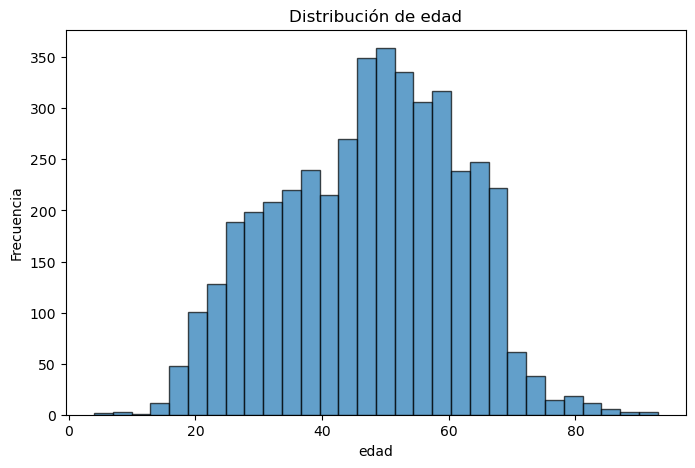

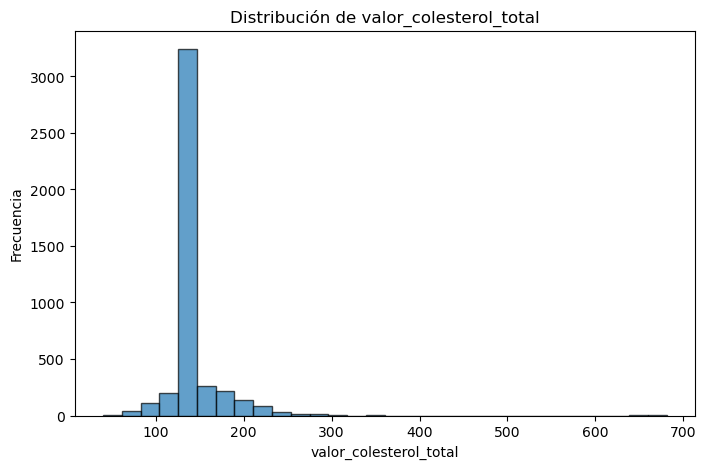

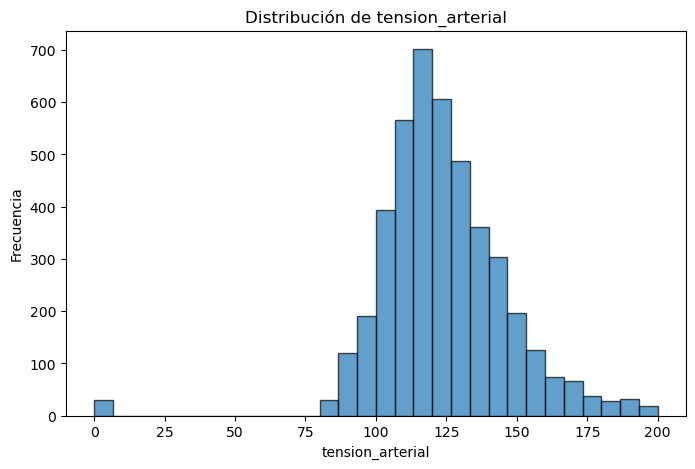

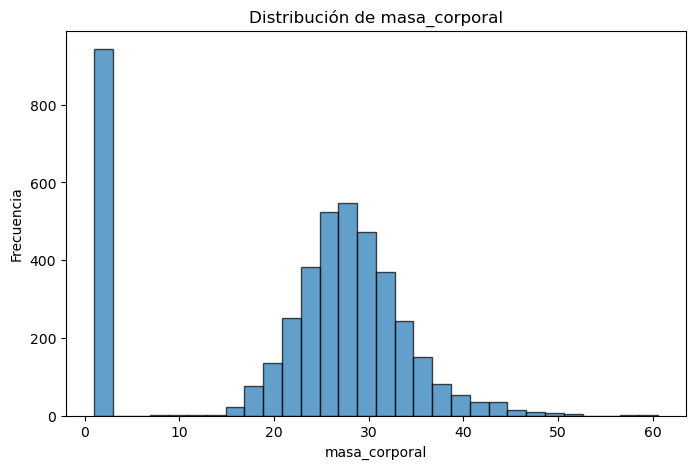

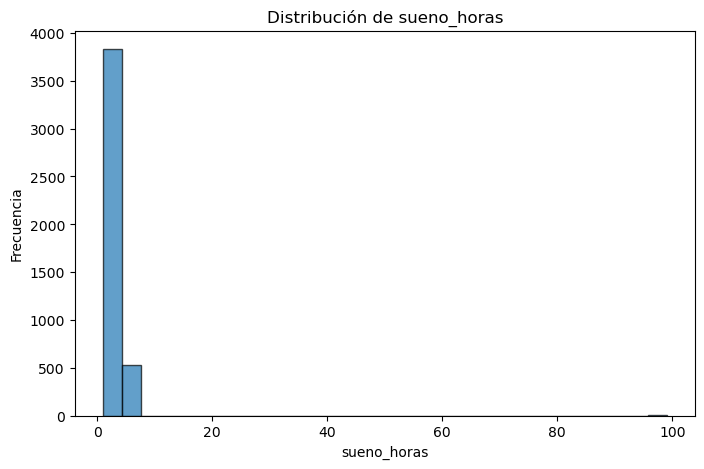

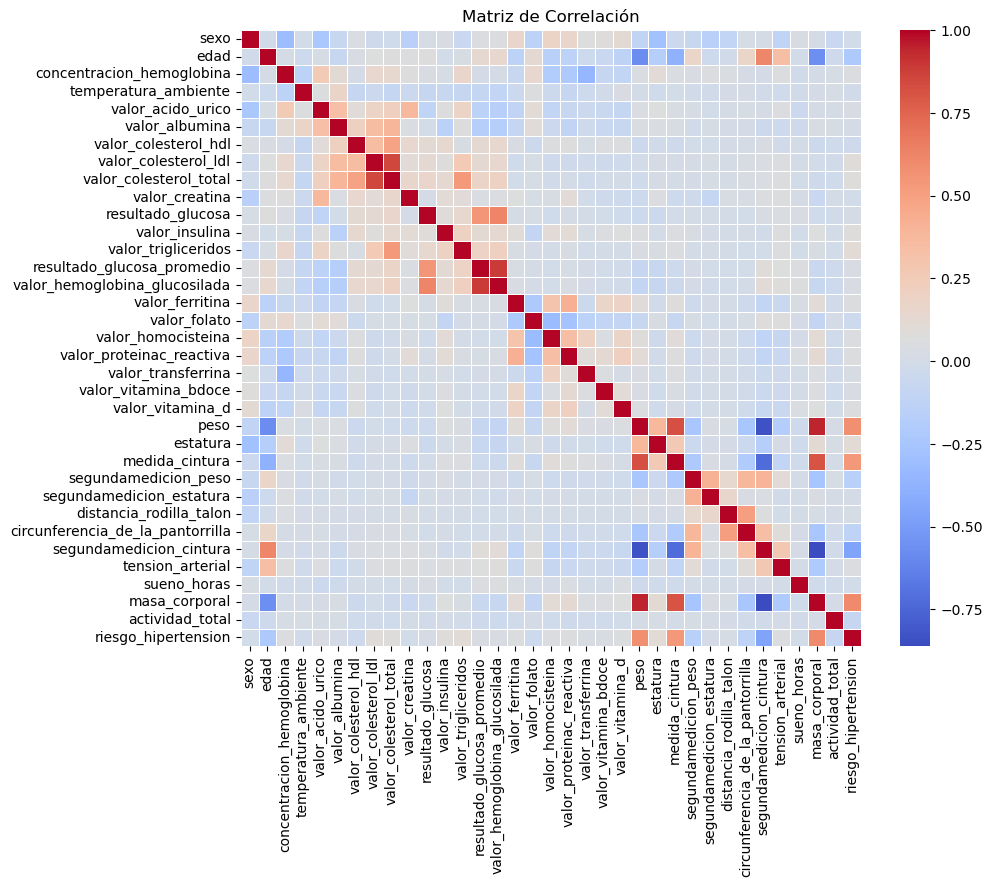

Correlaciones con hipertensión:
 riesgo_hipertension                 1.000000
masa_corporal                       0.600623
peso                                0.584276
medida_cintura                      0.535164
estatura                            0.110558
valor_trigliceridos                 0.109788
valor_colesterol_ldl                0.091117
valor_insulina                      0.082988
valor_colesterol_total              0.079897
valor_proteinac_reactiva            0.058647
valor_vitamina_d                    0.058313
valor_ferritina                     0.055644
tension_arterial                    0.054925
valor_homocisteina                  0.054722
concentracion_hemoglobina           0.051644
valor_acido_urico                   0.039462
resultado_glucosa_promedio          0.037151
valor_hemoglobina_glucosilada       0.036888
valor_vitamina_bdoce                0.033735
valor_transferrina                  0.029061
distancia_rodilla_talon             0.019345
resultado_glucosa     

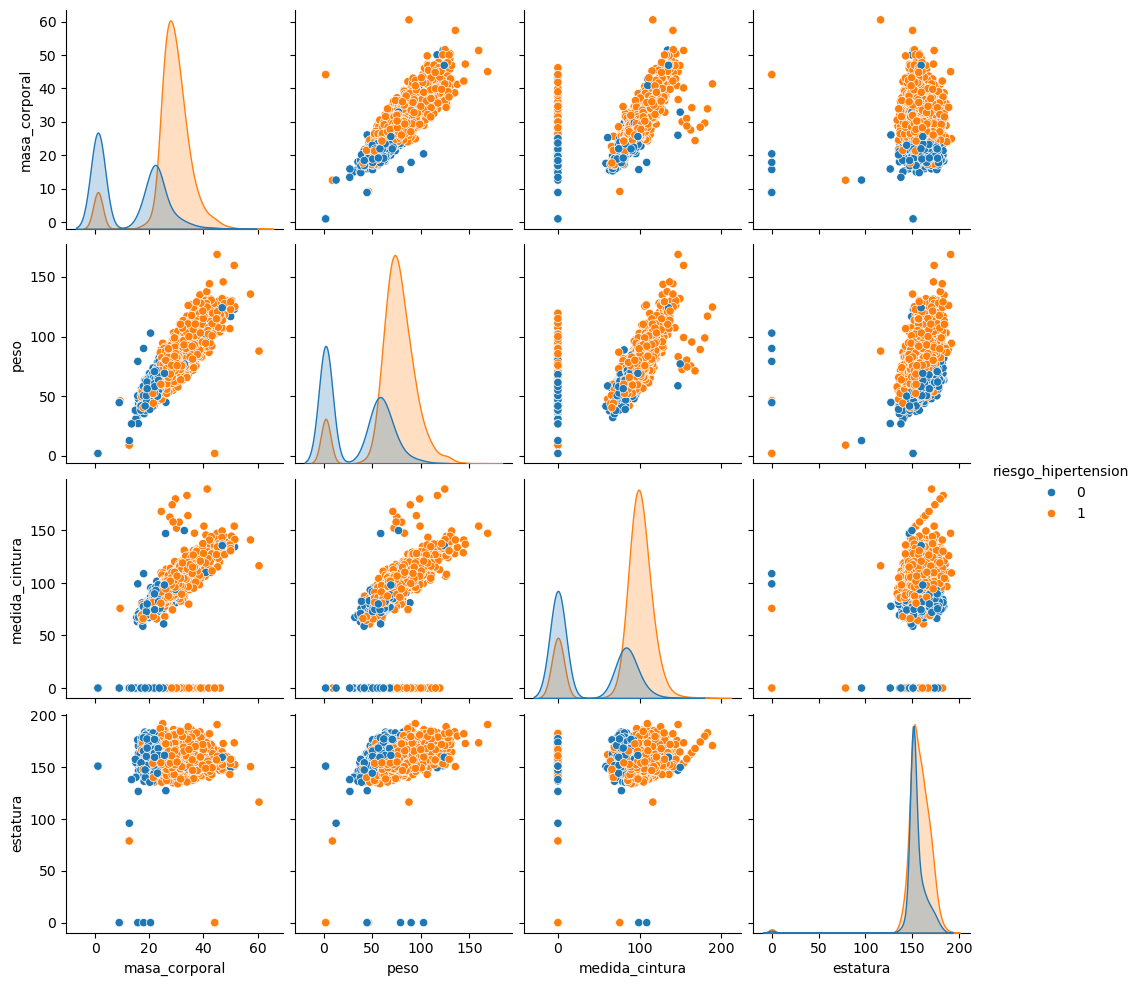

In [2]:
# Histogramas de variables clave
variables_clave = ["edad", "valor_colesterol_total", "tension_arterial", "masa_corporal", "sueno_horas"]

for var in variables_clave:
    plt.figure(figsize=(8, 5))
    plt.hist(df[var].dropna(), bins=30, edgecolor="black", alpha=0.7)
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {var}")
    plt.show()

# Matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Correlación con la variable objetivo (riesgo_hipertension)
correlation_target = correlation_matrix["riesgo_hipertension"].sort_values(ascending=False)
print("Correlaciones con hipertensión:\n", correlation_target)

# Graficar correlaciones más relevantes con hipertensión
variables_mas_correlacionadas = ["masa_corporal", "peso", "medida_cintura", "estatura", "riesgo_hipertension"]

sns.pairplot(df[variables_mas_correlacionadas], hue="riesgo_hipertension", diag_kind="kde")
plt.show()

Valores Atípicos Detectados:
                            Variable  Cantidad de Atípicos
0                               edad                     2
1          concentracion_hemoglobina                  1521
2               temperatura_ambiente                   912
3                  valor_acido_urico                  1318
4                     valor_albumina                  1251
5               valor_colesterol_hdl                  1306
6               valor_colesterol_ldl                  1337
7             valor_colesterol_total                  1347
8                     valor_creatina                  1326
9                  resultado_glucosa                  1318
10                    valor_insulina                  1088
11               valor_trigliceridos                  1349
12        resultado_glucosa_promedio                  1215
13     valor_hemoglobina_glucosilada                  1215
14                   valor_ferritina                   587
15                      val

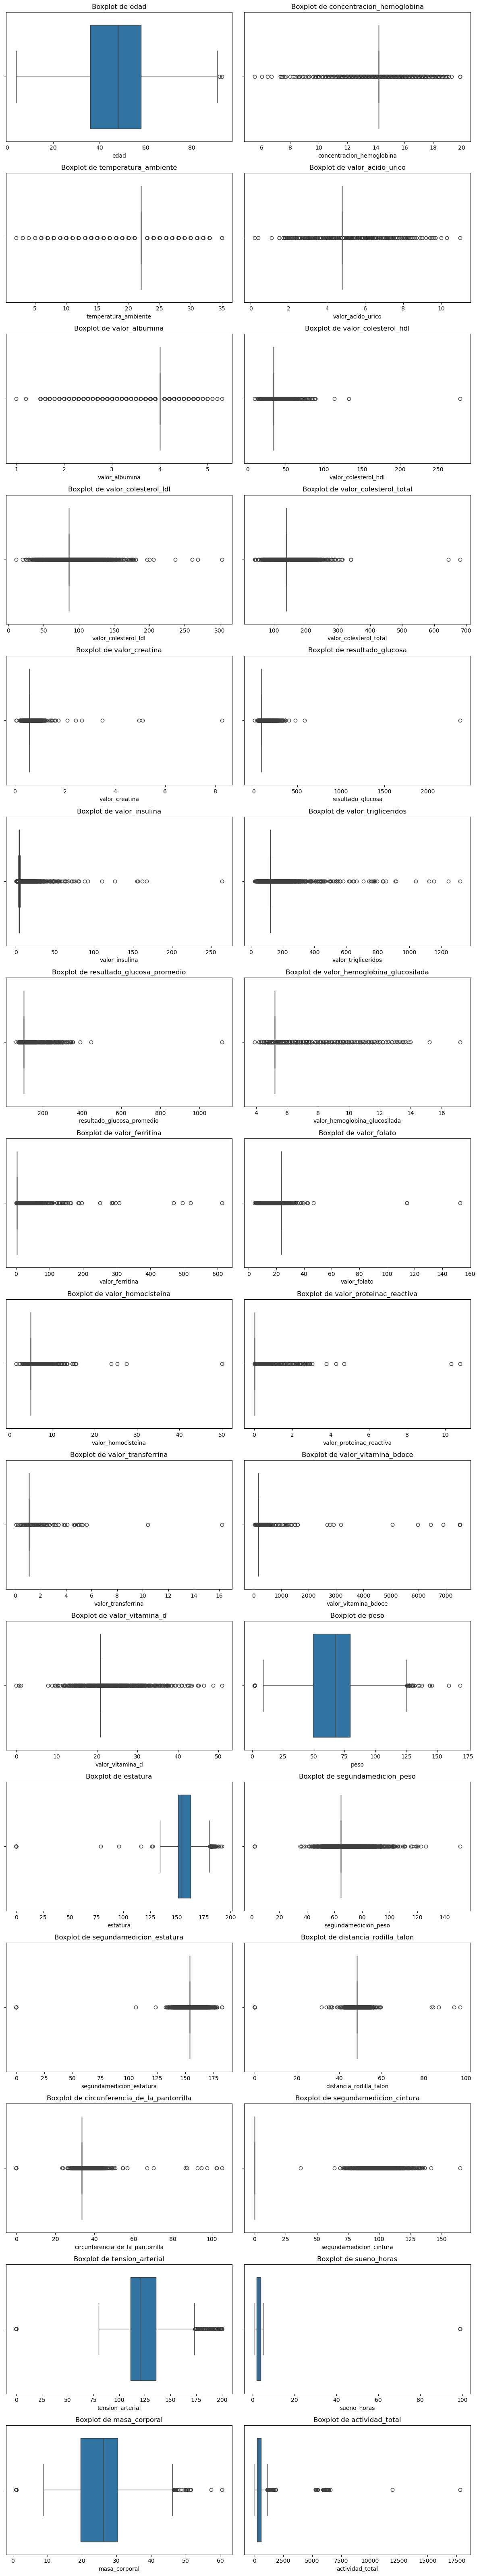

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el dataset
file_path = '/Users/rafaelorihuela/Documents/Master Ciencia Datos/Tesis/Hipertension_Arterial_Mexico.csv'  # Reemplaza con la ruta real
df = pd.read_csv(file_path)

# Función para detectar valores atípicos usando IQR
def detectar_valores_atipicos(df):
    outliers = pd.DataFrame()
    for col in df.select_dtypes(include=['number']).columns:  # Solo variables numéricas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound))
    return outliers

# Aplicar la detección de valores atípicos
outliers_df = detectar_valores_atipicos(df)

# Contar valores atípicos por columna
outliers_count = outliers_df.sum()
outliers_count = outliers_count[outliers_count > 0].reset_index()
outliers_count.columns = ["Variable", "Cantidad de Atípicos"]

# Mostrar la tabla de valores atípicos
print("Valores Atípicos Detectados:")
print(outliers_count)

# Lista de variables con valores atípicos
variables_atipicas = outliers_count["Variable"].tolist()

# Configurar el número de gráficos por fila y columna
num_cols = 2  # 2 gráficos por fila
num_rows = int(np.ceil(len(variables_atipicas) / num_cols))  # Ajusta las filas dinámicamente

# Crear figuras con subplots de 2 en 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()  # Convertimos los ejes en una lista para iterar fácilmente

# Generar boxplots
for i, var in enumerate(variables_atipicas):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")

# Eliminar gráficos vacíos si hay menos de 4 variables
for i in range(len(variables_atipicas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 1. Cargar el Dataset y Ver Datos Básicos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el dataset
file_path = "/Users/rafaelorihuela/Documents/Master Ciencia Datos/Tesis/Hipertension_Arterial_Mexico.csv"
df = pd.read_csv(file_path)

# Ver las primeras filas del dataset
print(df.head())

# Ver información general del dataset
print(df.info())

# Descripción estadística de las variables numéricas
print(df.describe())

         FOLIO_I  sexo  edad  concentracion_hemoglobina  temperatura_ambiente  \
0  2022_01001004     2    41                       14.2                    22   
1  2022_01001009     2    65                       14.1                     9   
2  2022_01001012     2    68                       14.2                    22   
3  2022_01001013     1    35                       15.7                    11   
4  2022_01001015     2    65                       12.7                     7   

   valor_acido_urico  valor_albumina  valor_colesterol_hdl  \
0                4.8             4.0                    34   
1                4.4             3.8                    73   
2                4.8             4.0                    34   
3                6.5             4.1                    49   
4                4.2             4.2                    41   

   valor_colesterol_ldl  valor_colesterol_total  ...  segundamedicion_peso  \
0                  86.0                     139  ...          

# 2. Histogramas de Variables Clave

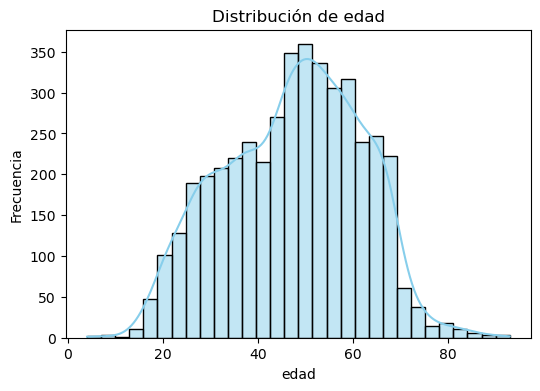

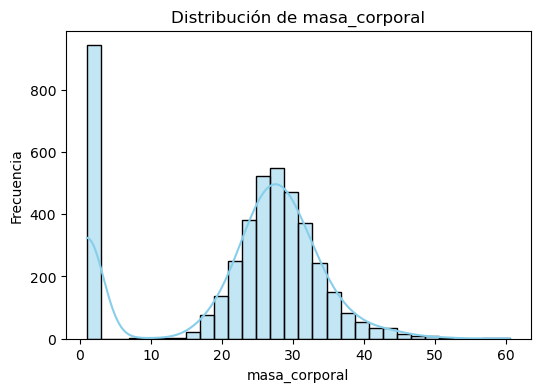

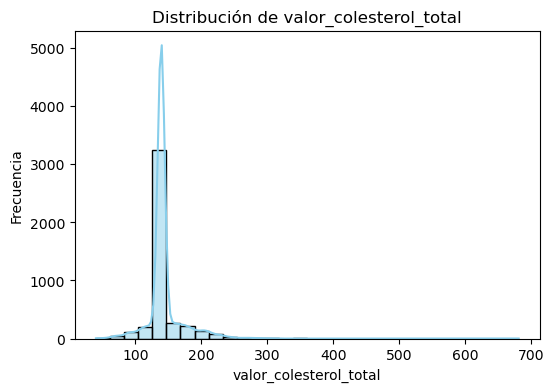

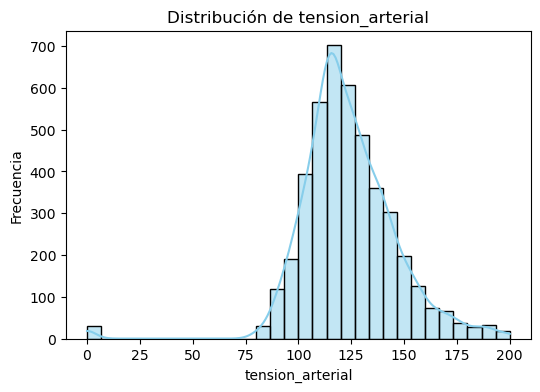

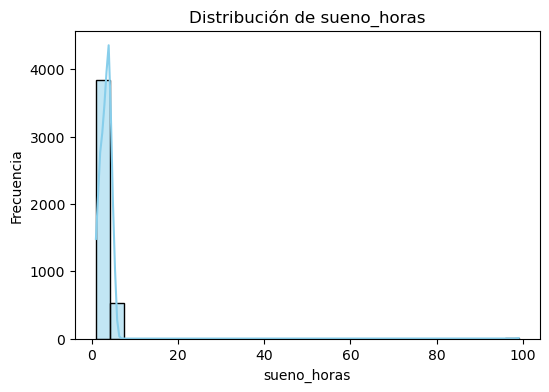

In [5]:
# Variables a analizar
variables_clave = ["edad", "masa_corporal", "valor_colesterol_total", "tension_arterial", "sueno_horas"]

# Crear histogramas
for var in variables_clave:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], bins=30, kde=True, color="skyblue")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {var}")
    plt.show()

# 3. Boxplots para Detección de Valores Atípicos

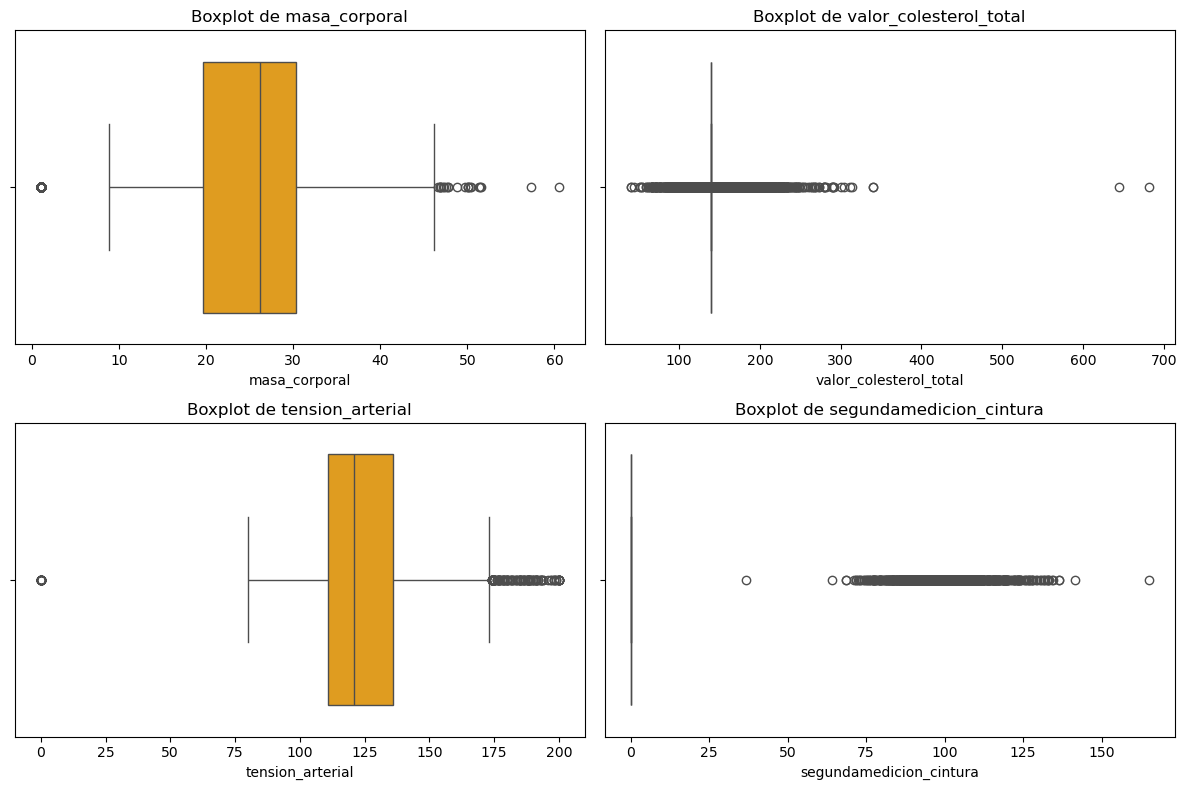

In [7]:
# Variables a analizar
variables_atipicas = ["masa_corporal", "valor_colesterol_total", "tension_arterial", "segundamedicion_cintura"]

# Configurar subplots de 2 en 2
num_cols = 2
num_rows = int(np.ceil(len(variables_atipicas) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, var in enumerate(variables_atipicas):
    sns.boxplot(x=df[var], ax=axes[i], color="orange")
    axes[i].set_title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

# 4. Heatmap de Correlación

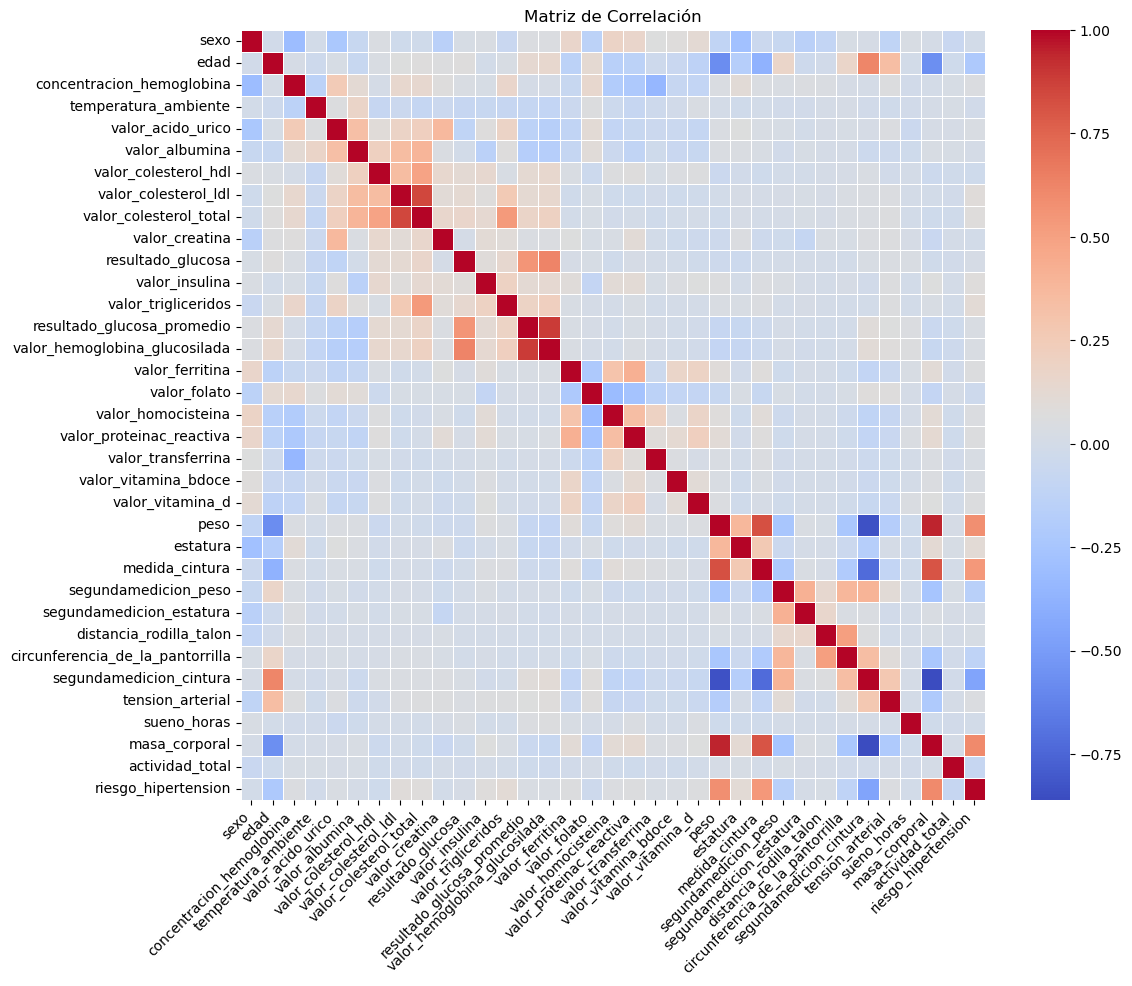

In [9]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.xticks(rotation=45, ha="right")
plt.savefig('heatmap.png', dpi=300, bbox_inches="tight")
plt.show()


# 5. Relación de Variables Clave con Hipertensión (Scatterplots)

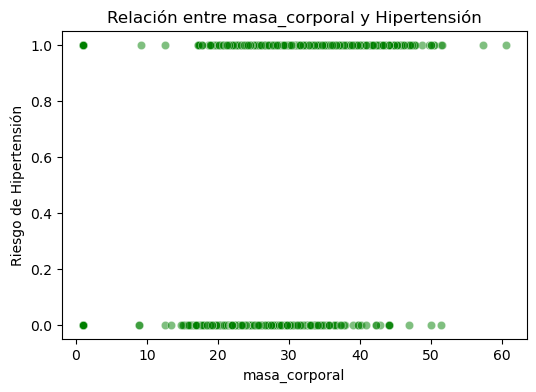

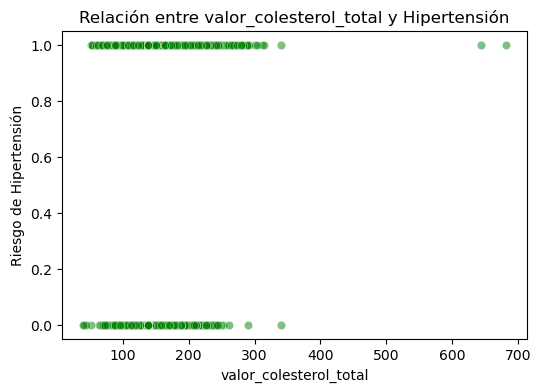

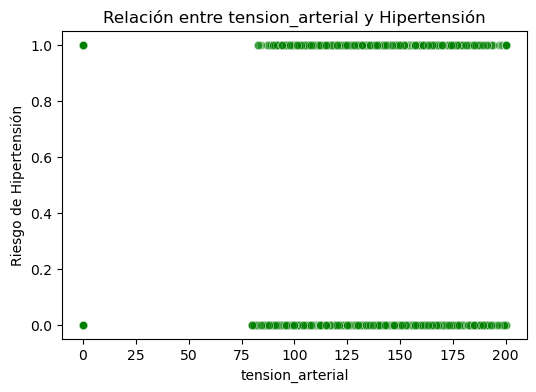

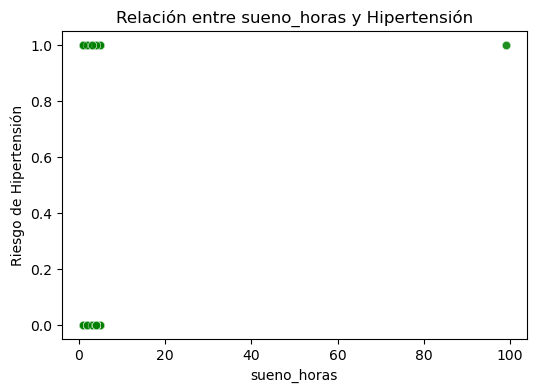

In [13]:
# Variables a analizar
variables_vs_hipertension = ["masa_corporal", "valor_colesterol_total", "tension_arterial", "sueno_horas"]

# Crear scatterplots
for var in variables_vs_hipertension:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var], y=df["riesgo_hipertension"], alpha=0.5, color="green")
    plt.xlabel(var)
    plt.ylabel("Riesgo de Hipertensión")
    plt.title(f"Relación entre {var} y Hipertensión")
    plt.show()

# 6. Comparación entre Personas con y sin Hipertensión (Boxplots por Grupo)

/var/folders/sg/z4g4lsbn7xld0pcvpvnnk4n40000gn/T/ipykernel_6439/1834676546.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["riesgo_hipertension"], y=df[var], palette="coolwarm")


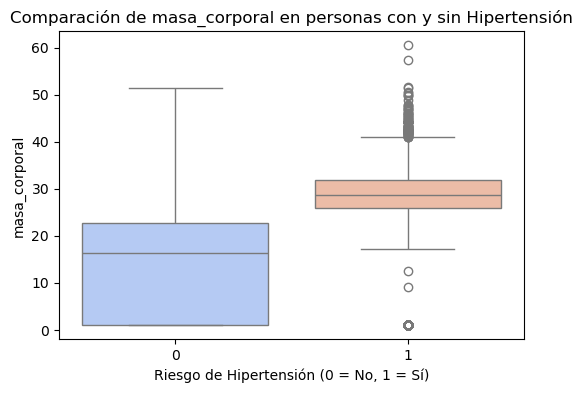

/var/folders/sg/z4g4lsbn7xld0pcvpvnnk4n40000gn/T/ipykernel_6439/1834676546.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["riesgo_hipertension"], y=df[var], palette="coolwarm")


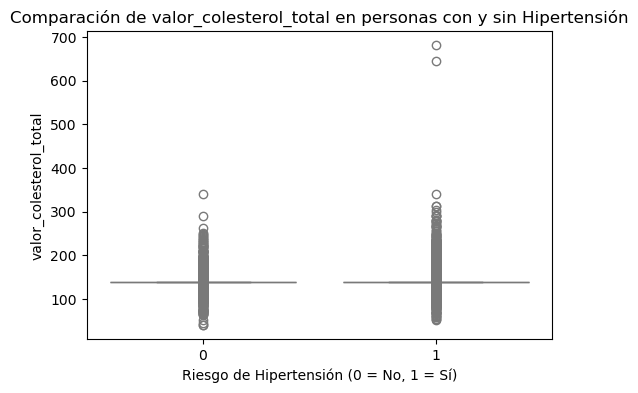

/var/folders/sg/z4g4lsbn7xld0pcvpvnnk4n40000gn/T/ipykernel_6439/1834676546.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["riesgo_hipertension"], y=df[var], palette="coolwarm")


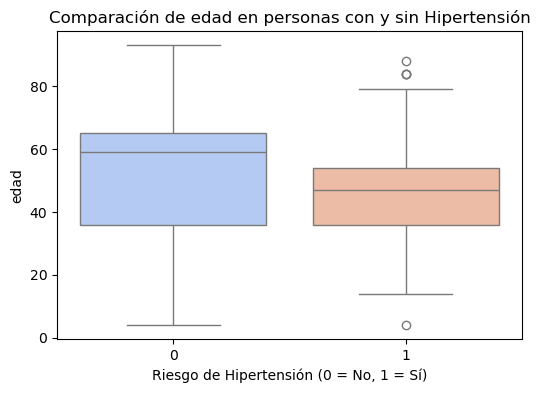

In [19]:
# Variables a comparar
variables_grupo = ["masa_corporal", "valor_colesterol_total", "edad"]

# Crear boxplots comparativos
for var in variables_grupo:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df["riesgo_hipertension"], y=df[var], palette="coolwarm")
    plt.xlabel("Riesgo de Hipertensión (0 = No, 1 = Sí)")
    plt.ylabel(var)
    plt.title(f"Comparación de {var} en personas con y sin Hipertensión")
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")

# Seleccionar variables clave
variables_clave = ["edad", "masa_corporal", "valor_colesterol_total", "tension_arterial", "sueno_horas"]

# Generar histogramas de variables clave
df[variables_clave].hist(bins=30, figsize=(15, 12), edgecolor="black")
plt.suptitle("Histogramas de Variables Clave", fontsize=16)

plt.show()


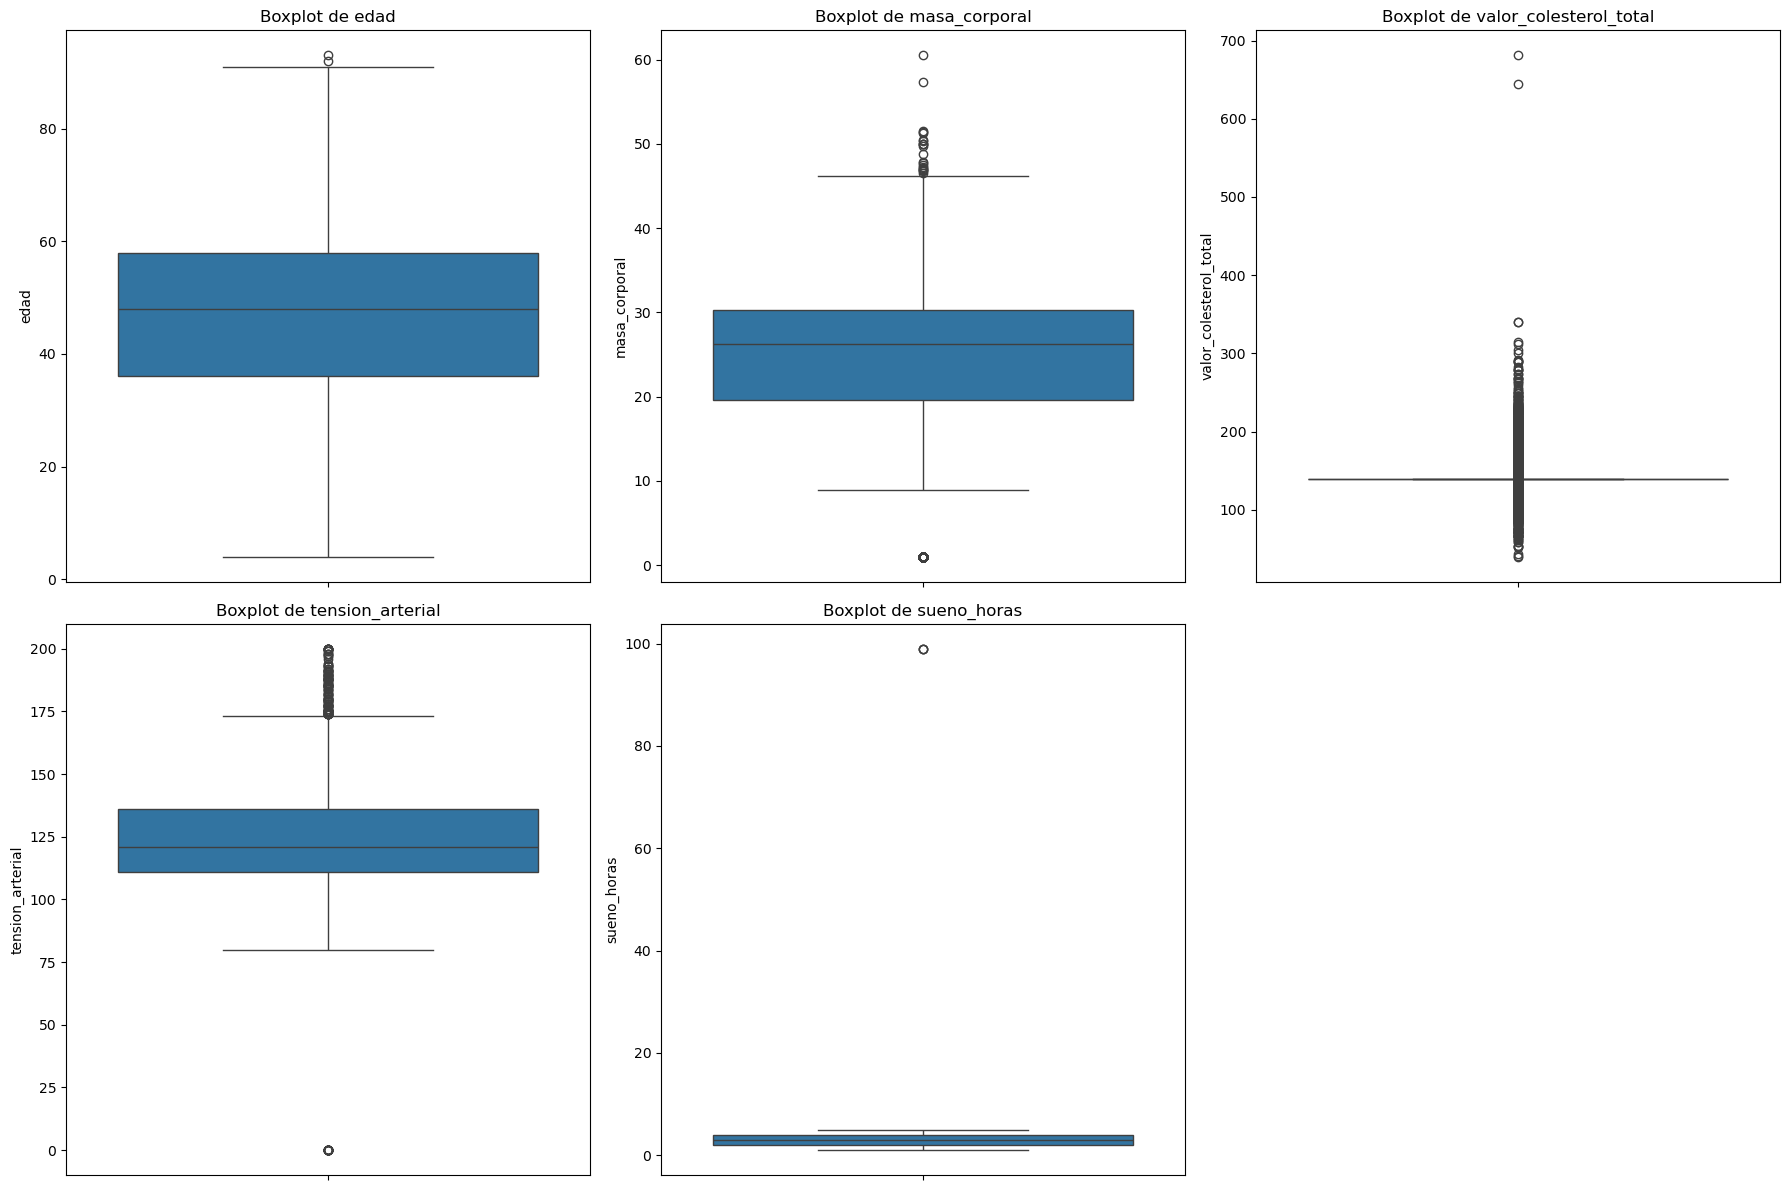

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")

# Configurar la figura con 2 filas y 3 columnas (para 5 gráficos, dejando una celda vacía)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Lista de variables clave para los boxplots
boxplot_vars = ["edad", "masa_corporal", "valor_colesterol_total", "tension_arterial", "sueno_horas"]

# Iterar sobre cada variable y graficarla en una subfigura
for i, var in enumerate(boxplot_vars):
    row, col = divmod(i, 3)  # Determinar la posición en la cuadrícula
    sns.boxplot(y=df[var], ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {var}")

# Eliminar el gráfico vacío si hay menos de 6 variables
axes[1, 2].set_visible(False)

# Ajustar diseño para evitar sobreposiciones
plt.tight_layout()
plt.savefig('Boxplot.png', dpi=300, bbox_inches="tight")
plt.show()


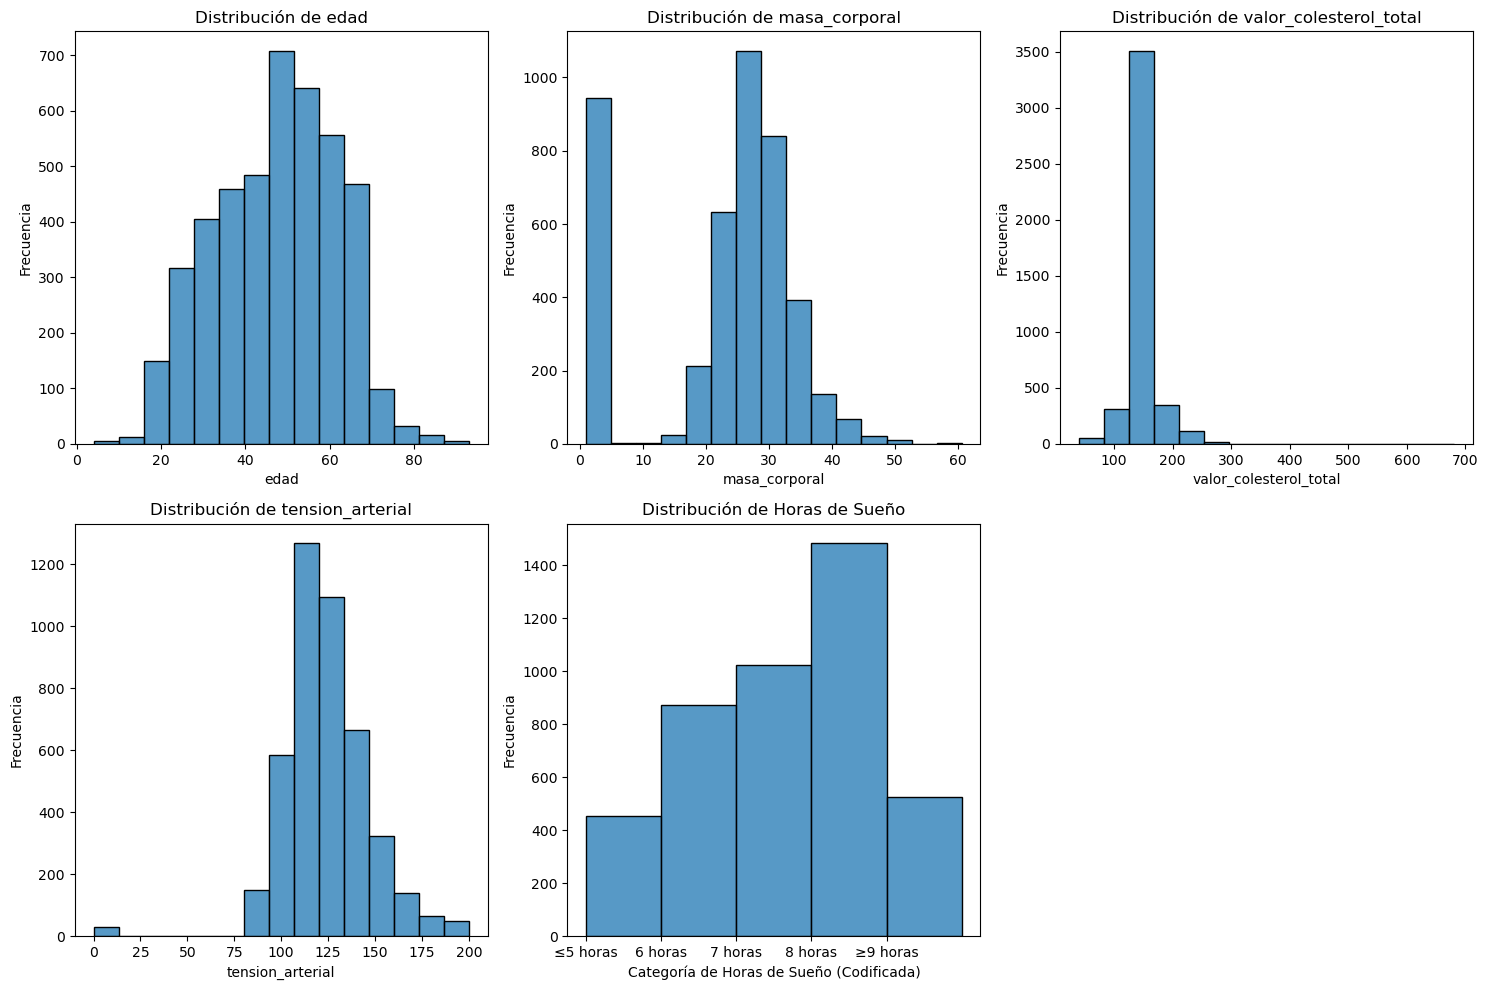

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")

# Crear la figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Variables clave incluyendo el sueño
variables_clave = ["edad", "masa_corporal", "valor_colesterol_total", "tension_arterial", "sueno_horas"]

# Generar los histogramas para cada variable clave excepto "sueno_horas"
for i, var in enumerate(variables_clave[:-1]):  # Excluir "sueno_horas" en esta iteración
    row, col = divmod(i, 3)  # Determinar la posición en la cuadrícula
    sns.histplot(df[var], bins=15, kde=False, edgecolor="black", ax=axes[row, col])
    axes[row, col].set_title(f"Distribución de {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("Frecuencia")

# Insertar el histograma corregido de "sueno_horas" en la última celda
row, col = divmod(len(variables_clave) - 1, 3)
sns.histplot(df["sueno_horas"], bins=[1, 2, 3, 4, 5, 6], kde=False, edgecolor="black", ax=axes[row, col])
axes[row, col].set_title("Distribución de Horas de Sueño")
axes[row, col].set_xlabel("Categoría de Horas de Sueño (Codificada)")
axes[row, col].set_ylabel("Frecuencia")
axes[row, col].set_xticks([1, 2, 3, 4, 5])
axes[row, col].set_xticklabels(["≤5 horas", "6 horas", "7 horas", "8 horas", "≥9 horas"])

# **Eliminar el último eje vacío**
axes[1, 2].set_visible(False)

# Ajustar el diseño para mejor visibilidad
plt.tight_layout()
plt.savefig('histograms.png', dpi=300, bbox_inches="tight")
plt.show()


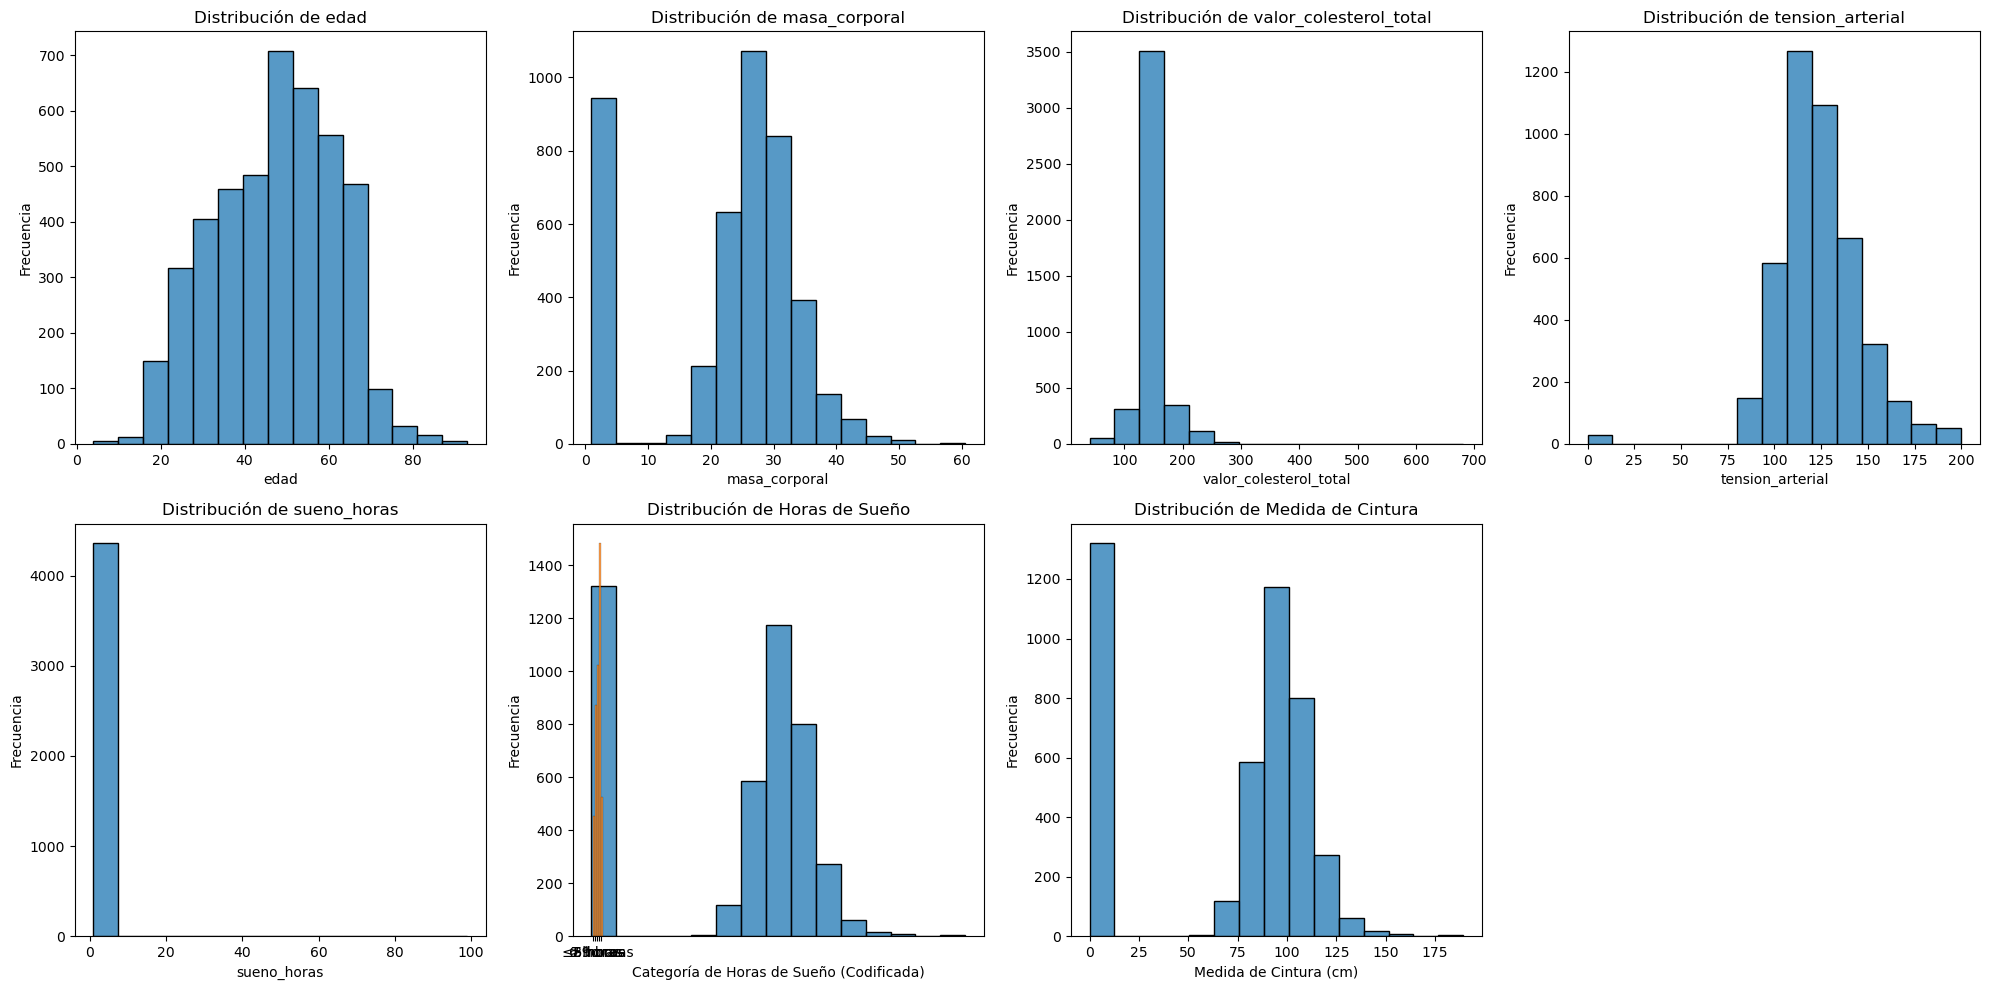

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")

# Crear la figura con 2 filas y 4 columnas para acomodar las nuevas variables
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Variables clave incluyendo las nuevas "medida_cintura" y "peso"
variables_clave = ["edad", "masa_corporal", "valor_colesterol_total", "tension_arterial", 
                   "sueno_horas", "medida_cintura", "peso"]

# Generar los histogramas para cada variable clave excepto "sueno_horas"
for i, var in enumerate(variables_clave[:-1]):  # Excluir "sueno_horas" en esta iteración
    row, col = divmod(i, 4)  # Ajustar la posición en la cuadrícula
    sns.histplot(df[var], bins=15, kde=False, edgecolor="black", ax=axes[row, col])
    axes[row, col].set_title(f"Distribución de {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel("Frecuencia")

# Insertar el histograma de "sueno_horas" en la celda correspondiente **SIN MODIFICARLO**
row, col = divmod(len(variables_clave) - 2, 4)
sns.histplot(df["sueno_horas"], bins=[1, 2, 3, 4, 5, 6], kde=False, edgecolor="black", ax=axes[row, col])
axes[row, col].set_title("Distribución de Horas de Sueño")
axes[row, col].set_xlabel("Categoría de Horas de Sueño (Codificada)")
axes[row, col].set_ylabel("Frecuencia")
axes[row, col].set_xticks([1, 2, 3, 4, 5])
axes[row, col].set_xticklabels(["≤5 horas", "6 horas", "7 horas", "8 horas", "≥9 horas"])

# Insertar el histograma de "medida_cintura"
row, col = divmod(len(variables_clave) - 1, 4)
sns.histplot(df["medida_cintura"], bins=15, kde=False, edgecolor="black", ax=axes[row, col])
axes[row, col].set_title("Distribución de Medida de Cintura")
axes[row, col].set_xlabel("Medida de Cintura (cm)")
axes[row, col].set_ylabel("Frecuencia")

# Insertar el histograma de "peso"
row, col = divmod(len(variables_clave), 4)
sns.histplot(df["peso"], bins=15, kde=False, edgecolor="black", ax=axes[row, col])
axes[row, col].set_title("Distribución de Peso")
axes[row, col].set_xlabel("Peso (kg)")
axes[row, col].set_ylabel("Frecuencia")

# **Eliminar el último eje vacío**
axes[1, 3].set_visible(False)

# Ajustar el diseño para mejor visibilidad
plt.tight_layout()
plt.savefig('histograms_updated.png', dpi=300, bbox_inches="tight")
plt.show()


In [13]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")

# Lista ampliada de variables biométricas (primarias y secundarias)
variables_biometricas_completas = [
    "peso",                         # Peso original
    "segundamedicion_peso",         # Segunda medición de peso
    "estatura",                     # Estatura original
    "segundamedicion_estatura",     # Segunda medición de estatura
    "masa_corporal",                # IMC
    "medida_cintura",               # Medida de cintura original
    "segundamedicion_cintura",      # Segunda medición de cintura
    "distancia_rodilla_talon",      # Rodilla-talón
    "circunferencia_de_la_pantorrilla"  # Pantorrilla
]

# Función para calcular porcentaje de valores atípicos (IQR)
def calcular_outliers(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((serie < lower) | (serie > upper)).sum()
    return round(outliers * 100 / len(serie), 2)

# Crear tabla con estadísticas descriptivas
tabla_completa = []
for var in variables_biometricas_completas:
    serie = df[var].dropna()
    tabla_completa.append({
        "Variable": var,
        "Media": round(serie.mean(), 2),
        "Desviación estándar": round(serie.std(), 2),
        "Mínimo": round(serie.min(), 2),
        "Máximo": round(serie.max(), 2),
        "Valores atípicos (%)": calcular_outliers(serie)
    })

# Convertir en DataFrame
tabla_biometricas_completa = pd.DataFrame(tabla_completa)

# Mostrar tabla
tabla_biometricas_completa

# (Opcional) Guardar como CSV
# tabla_biometricas_completa.to_csv("tabla_biometricas_completa.csv", index=False)


,Variable,Media,Desviación estándar,Mínimo,Máximo,Valores atípicos (%)
0,peso,58.29,33.21,2.0,168.80,22.71
1,segundamedicion_peso,65.79,7.45,2.0,151.20,20.81
2,estatura,156.17,14.71,0.0,192.00,1.56
3,segundamedicion_estatura,153.82,7.85,0.0,182.60,20.67
4,masa_corporal,22.45,12.31,1.0,60.51,22.12
5,medida_cintura,68.43,46.56,0.0,189.30,0.00
6,segundamedicion_cintura,19.99,40.44,0.0,165.00,19.94
7,distancia_rodilla_talon,48.46,3.49,0.0,97.30,21.06
8,circunferencia_de_la_pantorrilla,34.06,4.03,0.0,105.20,21.04


In [17]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")

# Lista de variables de laboratorio
columnas_laboratorio = [
    "concentracion_hemoglobina",
    "resultado_glucosa",
    "resultado_glucosa_promedio",
    "valor_hemoglobina_glucosilada",
    "valor_colesterol_total",
    "valor_colesterol_hdl",
    "valor_colesterol_ldl",
    "valor_trigliceridos",
    "valor_proteinac_reactiva",
    "valor_ferritina",
    "valor_folato",
    "valor_vitamina_bdoce",
    "valor_homocisteina",
    "valor_transferrina",
    "valor_vitamina_d"
]

# Función para calcular valores atípicos usando el rango intercuartílico (IQR)
def calcular_outliers(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((serie < lower) | (serie > upper)).sum()
    return round((outliers / len(serie)) * 100, 2)

# Generar la tabla
resumen = []
for col in columnas_laboratorio:
    serie = df[col].dropna()
    resumen.append({
        "Variable": col,
        "Media": round(serie.mean(), 2),
        "Desv. Estándar": round(serie.std(), 2),
        "Mínimo": round(serie.min(), 2),
        "Máximo": round(serie.max(), 2),
        "Valores atípicos (%)": calcular_outliers(serie)
    })

tabla_laboratorio = pd.DataFrame(resumen)

# Mostrar la tabla
tabla_laboratorio

# (Opcional) Guardar como archivo
# tabla_laboratorio.to_csv("tabla_laboratorio_estadistica.csv", index=False)


,Variable,Media,Desv. Estándar,Mínimo,Máximo,Valores atípicos (%)
0,concentracion_hemoglobina,14.23,1.15,5.50,19.90,34.86
1,resultado_glucosa,96.89,45.59,10.40,2372.00,30.21
2,resultado_glucosa_promedio,110.31,32.61,65.00,1114.00,27.85
3,valor_hemoglobina_glucosilada,5.45,1.01,3.90,17.20,27.85
4,valor_colesterol_total,144.14,28.23,40.00,681.00,30.87
5,valor_colesterol_hdl,36.03,8.08,9.00,279.00,29.93
6,valor_colesterol_ldl,87.81,17.53,11.10,303.00,30.64
7,valor_trigliceridos,137.27,77.75,23.00,1320.00,30.92
8,valor_proteinac_reactiva,0.09,0.36,0.02,10.78,13.11
9,valor_ferritina,7.65,24.60,0.70,613.20,13.45


In [27]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Hipertension_Arterial_Mexico.csv")

# Tabla de distribución de 'sueno_horas'
sueno_valores = df["sueno_horas"].value_counts().sort_index()
sueno_df = pd.DataFrame({
    "Valor": sueno_valores.index,
    "Frecuencia": sueno_valores.values
})
print("Distribución de la variable 'sueno_horas':")
print(sueno_df)

# Estadísticas de 'actividad_total'
actividad_total = df["actividad_total"]
actividad_stats = {
    "Variable": "actividad_total",
    "Media": actividad_total.mean(),
    "Desv. Estándar": actividad_total.std(),
    "Mínimo": actividad_total.min(),
    "Máximo": actividad_total.max(),
    "Valores nulos": actividad_total.isna().sum()
}
actividad_df = pd.DataFrame([actividad_stats])
print("\nEstadísticas de la variable 'actividad_total':")
actividad_df



Distribución de la variable 'sueno_horas':
   Valor  Frecuencia
0      1         452
1      2         874
2      3        1024
3      4        1483
4      5         527
5     99           3

Estadísticas de la variable 'actividad_total':


,Variable,Media,Desv. Estándar,Mínimo,Máximo,Valores nulos
0,actividad_total,481.815265,673.702857,10,17820,0
